# Financial Planning with APIs and Simulations

In this Challenge, you’ll create two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

You’ll use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.



In [2]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import warnings
import numpy as np
warnings.filterwarnings("ignore")

%matplotlib inline

In [3]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv()

True

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, you’ll determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, you’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, complete the following steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.

2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.

3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.

    > **Hint** Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.

4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.



In [4]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [5]:
# The monthly amount for the member's household income
# YOUR CODE HERE
monthly_income = 12000


#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [6]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [7]:
# Using the Python requests library, make an API call to access the current price of BTC
btc_response = requests.get(btc_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
# YOUR CODE HERE

json.dumps(btc_response)


'{"data": {"1": {"id": 1, "name": "Bitcoin", "symbol": "BTC", "website_slug": "bitcoin", "rank": 1, "circulating_supply": 19027850, "total_supply": 19027850, "max_supply": 21000000, "quotes": {"USD": {"price": 38285.0, "volume_24h": 25238041731, "market_cap": 726358341712, "percentage_change_1h": 1.10026447187031, "percentage_change_24h": -0.257312739499474, "percentage_change_7d": -3.22670846446562, "percent_change_1h": 1.10026447187031, "percent_change_24h": -0.257312739499474, "percent_change_7d": -3.22670846446562}}, "last_updated": 1651439354}}, "metadata": {"timestamp": 1651439354, "num_cryptocurrencies": 3106, "error": null}}'

In [8]:
# Using the Python requests library, make an API call to access the current price ETH
eth_response = requests.get(eth_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
# YOUR CODE HERE

json.dumps(eth_response)


'{"data": {"1027": {"id": 1027, "name": "Ethereum", "symbol": "ETH", "website_slug": "ethereum", "rank": 2, "circulating_supply": 120607286, "total_supply": 120607286, "max_supply": 0, "quotes": {"USD": {"price": 2807.63, "volume_24h": 15063629328, "market_cap": 337325515881, "percentage_change_1h": 1.31953655544387, "percentage_change_24h": 0.473731808035938, "percentage_change_7d": -4.52483183510412, "percent_change_1h": 1.31953655544387, "percent_change_24h": 0.473731808035938, "percent_change_7d": -4.52483183510412}}, "last_updated": 1651439279}}, "metadata": {"timestamp": 1651439279, "num_cryptocurrencies": 3106, "error": null}}'

#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [9]:
# Navigate the BTC response object to access the current price of BTC
btc_price = btc_response['data']['1']['quotes']['USD']['price']

# Print the current price of BTC
# YOUR CODE HERE
display(btc_price)


38285.0

In [10]:
# Navigate the BTC response object to access the current price of ETH
eth_price = eth_response['data']['1027']['quotes']['USD']['price']

# Print the current price of ETH
# YOUR CODE HERE
display(eth_price)


2807.63

### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [11]:
# Compute the current value of the BTC holding 
btc_value = btc_coins * btc_price

# Print current value of your holding in BTC
# YOUR CODE HERE
display(btc_value)


45942.0

In [12]:
# Compute the current value of the ETH holding 
eth_value = eth_coins * eth_price

# Print current value of your holding in ETH
# YOUR CODE HERE
display(eth_value)


14880.439

In [13]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding
total_crypto_wallet = eth_value + btc_value

# Print current cryptocurrency wallet balance
# YOUR CODE HERE
display(total_crypto_wallet)


60822.439

### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, you’ll determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. To do all this, complete the following steps:

1. In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.

4. Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [14]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200


#### Step 1: In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [15]:
# Set the variables for the Alpaca API and secret keys
alpaca_id = 'AKE41RKVN8YRICPJ9I5B'
alpaca_key = 'YVLTfowaXgIofyxUTJYc44sCCjjFEEbNGezRfqap'

# Create the Alpaca tradeapi.REST object
# YOUR CODE HERE

alpaca = tradeapi.REST(
    alpaca_id,
    alpaca_key,
    api_version="v2")


#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [16]:
# Set the tickers for both the bond and stock portion of the portfolio
# YOUR CODE HERE

tickers = ["SPY", "AGG"]

# Set timeframe to 1Day
# YOUR CODE HERE

timeframe = "1Day"

start_date = '2020-08-07'

end_date = '2020-08-07'

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07



#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

In [17]:
# Use the Alpaca get_bars function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
# YOUR CODE HERE

df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE

SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)
AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
# YOUR CODE HERE

df_portfolio = pd.concat([SPY,AGG],axis=1, keys=['SPY','AGG'])

# Review the first 5 rows of the Alpaca DataFrame
# YOUR CODE HERE

df_portfolio.head()


SPY                                     \
                            close    high    low trade_count    open   
timestamp                                                              
2020-08-07 04:00:00+00:00  334.57  334.88  332.3      350100  333.29   

                                                    AGG                   \
                             volume        vwap   close    high      low   
timestamp                                                                  
2020-08-07 04:00:00+00:00  57282821  333.800372  119.43  119.73  119.395   

                                                                    
                          trade_count    open   volume        vwap  
timestamp                                                           
2020-08-07 04:00:00+00:00       15246  119.66  5559066  119.475306

#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [18]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number
agg_close_price = df_portfolio['AGG']['close'][0]

# Print the AGG closing price
# YOUR CODE HERE
agg_close_price


119.43

In [19]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number
spy_close_price =  df_portfolio['SPY']['close'][0]

# Print the SPY closing price
# YOUR CODE HERE
spy_close_price

334.57

#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [20]:
# Calculate the current value of the bond portion of the portfolio
agg_value = agg_shares * agg_close_price


# Print the current value of the bond portfolio
# YOUR CODE HERE

agg_value


23886.0

In [21]:
# Calculate the current value of the stock portion of the portfolio
spy_value = spy_shares * spy_close_price

# Print the current value of the stock portfolio
# YOUR CODE HERE

spy_value

36802.7

In [22]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds = spy_value + agg_value

# Print the current balance of the stock and bond portion of the portfolio
# YOUR CODE HERE

display(total_stocks_bonds)

60688.7

In [23]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency walled to the value of the total stocks and bonds
total_portfolio = total_stocks_bonds + total_crypto_wallet

# Print current cryptocurrency wallet balance
# YOUR CODE HERE

display(total_portfolio)


121511.139

### Evaluate the Emergency Fund

In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [24]:
# Consolidate financial assets data into a Python list
# YOUR CODE HERE

savings_data = [total_crypto_wallet, total_stocks_bonds,]

# Review the Python list savings_data
# YOUR CODE HERE
display(savings_data)
    

[60822.439, 60688.7]

#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:


- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.





In [25]:
# Create a Pandas DataFrame called savings_df 
# YOUR CODE HERE

savings_df = pd.DataFrame(data=savings_data, columns=['amount'], index=['crypto', 'stock/bond'])

# Display the savings_df DataFrame
# YOUR CODE HERE

display(savings_df)

savings_df['amount'].dtype


,amount
crypto,60822.439
stock/bond,60688.700


dtype('float64')

#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

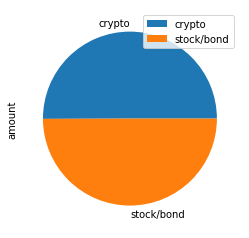

In [26]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
# YOUR CODE HERE

savings_df.plot.pie(y = 'amount')

#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [27]:
# Create a variable named emergency_fund_value
# YOUR CODE HERE

emergency_fund_value = 3 * monthly_income


##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [28]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:
# YOUR CODE HERE
# YOUR CODE HERE
# YOUR CODE HERE

if total_portfolio > emergency_fund_value:
    print('congrats your emergency fund is complete'),
elif total_portfolio == emergency_fund_value:
    print('congratulations on reaching this important financial goal'),
else: 
    print(f'you are{emergency_fund_value - total_portfolio} away from reaching your emergency fund goal')

 


congrats your emergency fund is complete


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [29]:
# Set start and end dates of 3 years back from your current date
# Alternatively, you can use an end date of 2020-08-07 and work 3 years back from that date 
# YOUR CODE HERE
# YOUR CODE HERE

start_date = '2018-08-07'

end_date = '2020-08-07'

# Set number of rows to 1000 to retrieve the maximum amount of rows
# YOUR CODE HERE

rows = '1000'

In [30]:
# Use the Alpaca get_bars function to make the API call to get the 3 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Remember to add the df property to the end of the call so the response is returned as a DataFrame
# YOUR CODE HERE


montecarlosim = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE

SPY2 = montecarlosim[montecarlosim['symbol']=='SPY'].drop('symbol', axis=1)
AGG2 = montecarlosim[montecarlosim['symbol']=='AGG'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
# YOUR CODE HERE

montecarlosim = pd.concat([SPY2,AGG2],axis=1, keys=['SPY','AGG'])

# Display both the first and last five rows of the DataFrame
# YOUR CODE HERE
# YOUR CODE HERE

display(montecarlosim.head())
display(montecarlosim.tail())

SPY                                        \
                            close     high      low trade_count    open   
timestamp                                                                 
2018-08-07 04:00:00+00:00  285.58  286.010  285.240      181015  285.40   
2018-08-08 04:00:00+00:00  285.46  285.910  284.940      154349  285.39   
2018-08-09 04:00:00+00:00  285.07  285.970  284.915      140980  285.54   
2018-08-10 04:00:00+00:00  283.16  284.055  282.360      292690  283.42   
2018-08-13 04:00:00+00:00  282.10  284.160  281.770      270772  283.49   

                                                    AGG                    \
                             volume        vwap   close    high       low   
timestamp                                                                   
2018-08-07 04:00:00+00:00  43427090  285.635439  105.85  105.97  105.8250   
2018-08-08 04:00:00+00:00  42273966  285.479104  105.85  105.91  105.8000   
2018-08-09 04:00:00+00:00  37130583  285.455348  106.00  106.04  105.9329   
2018-08-10 04:00:00+00:00  77399449  283.350560  106.23  106.36  106.1100   
2018-08-13 04:00:00+00:00  65970064  282.691061  106.29  106.30  106.1501   

                                                                    
                          trade_count    open   volume        vwap  
timestamp                                                           
2018-08-07 04:00:00+00:00        9522  105.97  2532774  105.876672  
2018-08-08 04:00:00+00:00        9394  105.83  1937527  105.848006  
2018-08-09 04:00:00+00:00       10063  105.97  2386756  105.993103  
2018-08-10 04:00:00+00:00       12317  106.11  4136487  106.238745  
2018-08-13 04:00:00+00:00       13888  106.16  2786308  106.241962

SPY                                      \
                            close    high     low trade_count    open   
timestamp                                                               
2020-08-03 04:00:00+00:00  328.79  329.62  327.73      288008  328.31   
2020-08-04 04:00:00+00:00  330.06  330.06  327.86      250900  327.88   
2020-08-05 04:00:00+00:00  332.11  332.39  331.18      241416  331.46   
2020-08-06 04:00:00+00:00  334.33  334.46  331.13      290039  331.52   
2020-08-07 04:00:00+00:00  334.57  334.88  332.30      350100  333.29   

                                                    AGG                    \
                             volume        vwap   close    high       low   
timestamp                                                                   
2020-08-03 04:00:00+00:00  53080454  328.658804  119.40  119.40  119.1903   
2020-08-04 04:00:00+00:00  41918004  329.057593  119.63  119.63  119.4200   
2020-08-05 04:00:00+00:00  42870955  331.791643  119.40  119.49  119.3100   
2020-08-06 04:00:00+00:00  43745653  332.937218  119.57  119.73  119.5300   
2020-08-07 04:00:00+00:00  57282821  333.800372  119.43  119.73  119.3950   

                                                                     
                          trade_count    open    volume        vwap  
timestamp                                                            
2020-08-03 04:00:00+00:00       36359  119.37  13014535  119.282420  
2020-08-04 04:00:00+00:00       39114  119.42  10935181  119.541666  
2020-08-05 04:00:00+00:00       42313  119.39  17377874  119.387245  
2020-08-06 04:00:00+00:00       15938  119.62   4608710  119.604199  
2020-08-07 04:00:00+00:00       15246  119.66   5559066  119.475306

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [33]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.
# YOUR CODE HERE

from MCForecastTools import MCSimulation

mcthirty = MCSimulation(
    portfolio_data = montecarlosim,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*30
)


# Review the simulation input data
# YOUR CODE HERE

mcthirty.portfolio_data.head()


SPY                                        \
                            close     high      low trade_count    open   
timestamp                                                                 
2018-08-07 04:00:00+00:00  285.58  286.010  285.240      181015  285.40   
2018-08-08 04:00:00+00:00  285.46  285.910  284.940      154349  285.39   
2018-08-09 04:00:00+00:00  285.07  285.970  284.915      140980  285.54   
2018-08-10 04:00:00+00:00  283.16  284.055  282.360      292690  283.42   
2018-08-13 04:00:00+00:00  282.10  284.160  281.770      270772  283.49   

                                                                 AGG          \
                             volume        vwap daily_return   close    high   
timestamp                                                                      
2018-08-07 04:00:00+00:00  43427090  285.635439          NaN  105.85  105.97   
2018-08-08 04:00:00+00:00  42273966  285.479104    -0.000420  105.85  105.91   
2018-08-09 04:00:00+00:00  37130583  285.455348    -0.001366  106.00  106.04   
2018-08-10 04:00:00+00:00  77399449  283.350560    -0.006700  106.23  106.36   
2018-08-13 04:00:00+00:00  65970064  282.691061    -0.003743  106.29  106.30   

                                                                              \
                                low trade_count    open   volume        vwap   
timestamp                                                                      
2018-08-07 04:00:00+00:00  105.8250        9522  105.97  2532774  105.876672   
2018-08-08 04:00:00+00:00  105.8000        9394  105.83  1937527  105.848006   
2018-08-09 04:00:00+00:00  105.9329       10063  105.97  2386756  105.993103   
2018-08-10 04:00:00+00:00  106.1100       12317  106.11  4136487  106.238745   
2018-08-13 04:00:00+00:00  106.1501       13888  106.16  2786308  106.241962   

                                        
                          daily_return  
timestamp                               
2018-08-07 04:00:00+00:00          NaN  
2018-08-08 04:00:00+00:00     0.000000  
2018-08-09 04:00:00+00:00     0.001417  
2018-08-10 04:00:00+00:00     0.002170  
2018-08-13 04:00:00+00:00     0.000565

In [34]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE

mcthirty.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.985467,1.004136,1.017675,1.007260,0.995296,1.001138,0.995308,0.999068,1.001848,0.996896,...,0.997917,0.999779,1.012709,0.993128,1.019110,1.002065,0.980659,0.983999,1.006621,0.999985
2,0.976495,1.002029,1.031135,1.002936,0.999490,0.991850,0.995455,1.001299,0.997308,0.990538,...,0.983615,1.003429,1.001151,0.968078,1.049710,0.992900,0.990309,0.990341,1.016239,1.002902
3,0.973957,1.002084,1.023328,0.997727,0.994844,1.001692,0.981871,1.008624,0.993440,0.996257,...,0.966343,0.996011,1.004307,0.945864,1.057503,0.989504,0.988607,0.992759,1.018168,0.988608
4,0.965729,0.998431,1.010760,0.984343,0.991163,1.002280,0.972613,1.011290,0.982724,0.995599,...,0.959355,1.017665,1.006052,0.941758,1.050946,0.997412,0.996685,0.971169,1.020989,0.974955
5,0.970856,0.983104,1.013301,0.966015,1.004100,0.997580,0.957696,1.013696,0.986080,1.022834,...,0.979758,1.019338,1.004419,0.934966,1.056622,0.993389,1.001671,0.953939,1.015204,0.983934
6,0.974329,0.997454,0.996920,0.988954,0.992841,0.994339,0.949710,1.021343,0.999875,1.016560,...,0.973332,1.033893,1.005308,0.928816,1.048729,0.995384,1.009400,0.948392,1.017676,0.974841
7,0.981232,1.003935,0.998787,0.982811,1.005097,0.996919,0.948749,1.038651,1.007922,1.009362,...,0.988437,1.024287,1.005401,0.943779,1.077543,0.994265,1.013499,0.948854,1.012446,0.968182
8,0.989598,0.994825,1.013259,0.981114,1.001941,0.999187,0.959903,1.036829,1.014393,0.995503,...,0.981954,1.038689,1.010633,0.941313,1.061096,1.012270,1.025186,0.953629,1.022405,0.976568
9,1.001907,1.004415,0.998596,0.971774,1.003781,1.007945,0.960335,1.057280,1.003143,1.005617,...,0.982706,1.036438,1.013588,0.947769,1.050739,1.004016,1.038344,0.947636,1.010861,0.973203


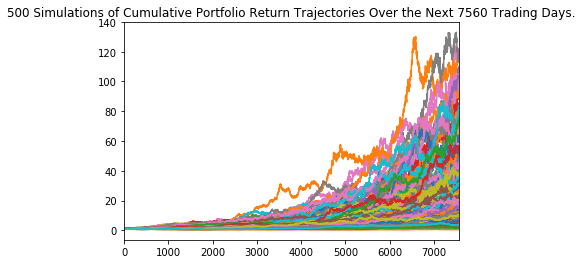

In [35]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
# YOUR CODE HERE
mcthirtyplot = mcthirty.plot_simulation()

#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

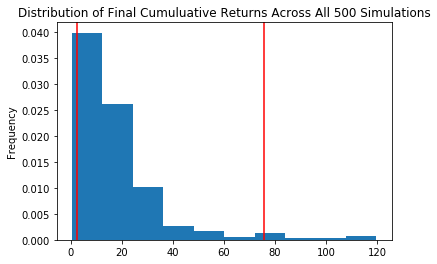

In [37]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
# YOUR CODE HERE
mcthirtyhist = mcthirty.plot_distribution()


#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [48]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
# YOUR CODE HERE

mcthirty_summary = mcthirty.summarize_cumulative_return()

# Review the 30-year Monte Carlo summary statistics
# YOUR CODE HERE

mcthirty_summary

count           500.000000
mean             17.861760
std              17.939755
min               0.474585
25%               6.838081
50%              12.732150
75%              22.017089
max             119.734305
95% CI Lower      2.486339
95% CI Upper     75.732457
Name: 7560, dtype: float64

### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [41]:
# Print the current balance of the stock and bond portion of the members portfolio
# YOUR CODE HERE

total_stocks_bonds


60688.7

In [50]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
mcthirty_95_lower_cumulative_return = mcthirty_summary[8] * total_stocks_bonds
mcthirty_95_upper_cumulative_return = mcthirty_summary[9] * total_stocks_bonds

# Print the result of your calculations
# YOUR CODE HERE
display(mcthirty_95_lower_cumulative_return)
display(mcthirty_95_upper_cumulative_return)


150892.6994384967

4596104.393397259

### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [56]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.
# YOUR CODE HERE

mcten = MCSimulation(
    portfolio_data = montecarlosim,
    weights = [.20,.80],
    num_simulation = 500,
    num_trading_days = 252*10
)


# Review the simulation input data
# YOUR CODE HERE

display(mcten.portfolio_data)



SPY                                          \
                            close      high       low trade_count    open   
timestamp                                                                   
2018-08-07 04:00:00+00:00  285.58  286.0100  285.2400      181015  285.40   
2018-08-08 04:00:00+00:00  285.46  285.9100  284.9400      154349  285.39   
2018-08-09 04:00:00+00:00  285.07  285.9700  284.9150      140980  285.54   
2018-08-10 04:00:00+00:00  283.16  284.0550  282.3600      292690  283.42   
2018-08-13 04:00:00+00:00  282.10  284.1600  281.7700      270772  283.49   
2018-08-14 04:00:00+00:00  283.90  284.1700  282.0500      193568  282.94   
2018-08-15 04:00:00+00:00  281.78  282.5400  280.1600      437746  282.35   
2018-08-16 04:00:00+00:00  284.06  285.0400  283.3600      259400  283.38   
2018-08-17 04:00:00+00:00  285.06  285.5601  283.3700      244275  283.76   
2018-08-20 04:00:00+00:00  285.67  285.9700  285.0600      160489  285.58   
2018-08-21 04:00:00+00:00  286.34  287.3100  285.7135      243816  286.26   
2018-08-22 04:00:00+00:00  286.17  286.7600  285.5750      190750  285.89   
2018-08-23 04:00:00+00:00  285.79  286.9400  285.4300      196814  285.94   
2018-08-24 04:00:00+00:00  287.51  287.6700  286.3800      219986  286.46   
2018-08-27 04:00:00+00:00  289.78  289.9000  288.6800      213475  288.86   
2018-08-28 04:00:00+00:00  289.92  290.4175  289.4000      174509  290.30   
2018-08-29 04:00:00+00:00  291.48  291.7400  289.8854      207173  290.16   
2018-08-30 04:00:00+00:00  290.30  291.3600  289.6300      270414  290.94   
2018-08-31 04:00:00+00:00  290.31  290.8100  289.2900      237749  289.84   
2018-09-04 04:00:00+00:00  289.81  290.2100  288.6800      246057  289.85   
2018-09-05 04:00:00+00:00  289.03  289.6400  287.8900      291581  289.41   
2018-09-06 04:00:00+00:00  288.16  289.4900  287.0000      289835  289.17   
2018-09-07 04:00:00+00:00  287.60  288.7000  286.7100      309155  286.96   
2018-09-10 04:00:00+00:00  288.10  289.0400  287.8800      207070  288.74   
2018-09-11 04:00:00+00:00  289.05  289.5500  286.9750      213944  287.37   
2018-09-12 04:00:00+00:00  289.12  289.8000  288.2300      269018  289.05   
2018-09-13 04:00:00+00:00  290.83  291.0384  289.9950      234792  290.30   
2018-09-14 04:00:00+00:00  290.88  291.2700  290.0000      222197  291.11   
2018-09-17 04:00:00+00:00  289.34  290.8600  289.0300      248360  290.82   
2018-09-18 04:00:00+00:00  290.91  291.5800  289.5500      227465  289.55   
...                           ...       ...       ...         ...     ...   
2020-06-26 04:00:00+00:00  300.05  306.3900  299.4200      668903  306.17   
2020-06-29 04:00:00+00:00  304.46  304.6100  298.9300      430064  301.42   
2020-06-30 04:00:00+00:00  308.36  310.2000  303.8200      523385  304.01   
2020-07-01 04:00:00+00:00  310.52  311.8900  309.0700      418495  309.57   
2020-07-02 04:00:00+00:00  312.23  315.7000  311.5100      433528  314.24   
2020-07-06 04:00:00+00:00  317.05  317.6800  315.5600      331249  316.38   
2020-07-07 04:00:00+00:00  313.78  317.5200  313.3700      398769  315.38   
2020-07-08 04:00:00+00:00  316.18  316.3000  312.7000      325900  314.59   
2020-07-09 04:00:00+00:00  314.38  317.1000  310.6800      471318  316.85   
2020-07-10 04:00:00+00:00  317.59  317.8800  312.7600      320870  314.26   
2020-07-13 04:00:00+00:00  314.84  322.7100  314.1300      527355  320.06   
2020-07-14 04:00:00+00:00  318.92  319.7600  312.0000      580271  313.25   
2020-07-15 04:00:00+00:00  321.85  323.0400  319.2650      501289  322.48   
2020-07-16 04:00:00+00:00  320.79  321.2800  319.0900      356445  319.78   
2020-07-17 04:00:00+00:00  321.72  322.5700  319.7350      324202  321.82   
2020-07-20 04:00:00+00:00  324.32  325.1300  320.6200      302422  321.41   
2020-07-21 04:00:00+00:00  325.01  326.9300  323.9400      337840  326.48   
2020-07-22 04:00:00+00:00  326.86  327.2000  324.5000      313095  324.62   
2020-07-23 04:00:00+00:00 

In [57]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE

mcten.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996363,1.003829,0.998506,1.001627,1.002676,0.996203,1.001802,1.000067,0.997552,0.999419,...,1.002139,1.001390,0.998246,0.997806,1.008331,1.005176,0.996534,0.999365,1.000727,1.001337
2,0.994841,1.003434,1.002496,1.004558,1.004457,1.005766,1.005275,0.995616,0.990545,0.999698,...,0.996651,0.999699,0.992466,1.003935,1.007955,1.007993,0.998484,0.999512,1.002205,1.001301
3,0.993210,1.003454,1.005350,1.006790,1.002148,1.003428,1.012312,1.002579,0.994191,0.999403,...,1.001630,0.996639,0.990886,1.005420,1.018028,1.007637,0.996766,1.002029,0.997831,1.002823
4,1.000535,1.002109,1.009163,1.016447,0.996651,1.000300,1.015818,1.009876,0.989551,1.001966,...,1.001912,0.998230,0.997247,1.009939,1.019896,1.013079,1.002888,1.004520,1.001550,1.001817
5,0.994385,1.009899,1.011958,1.020657,0.995658,0.999910,1.014990,0.998954,0.989737,1.003866,...,1.000536,0.990638,1.000699,1.007505,1.014654,1.012284,1.005010,1.007535,1.009666,1.000747
6,0.997478,1.007172,1.014138,1.020173,0.991056,1.004828,1.019789,0.998589,0.983660,1.008541,...,0.994803,0.991609,0.992688,1.006202,1.027385,1.001376,0.999610,1.008062,1.007286,1.000823
7,1.002649,1.002592,1.011818,1.015164,0.986151,1.003877,1.022099,1.005273,0.989798,1.006017,...,0.993898,0.993506,0.993766,1.008315,1.025359,1.000777,1.001238,1.005221,1.011444,1.003310
8,1.006486,1.002360,1.014035,1.014443,0.984246,1.007549,1.021932,1.006560,0.984104,1.009316,...,0.997950,0.995569,0.998051,1.003631,1.029538,0.999699,0.992849,1.019328,1.016182,1.003699
9,1.015563,1.008544,1.016164,1.009502,0.987029,1.018518,1.025242,1.010044,0.989619,1.012252,...,0.996038,0.994746,1.002328,1.000865,1.028356,1.008573,0.998616,1.021529,1.013217,1.004740


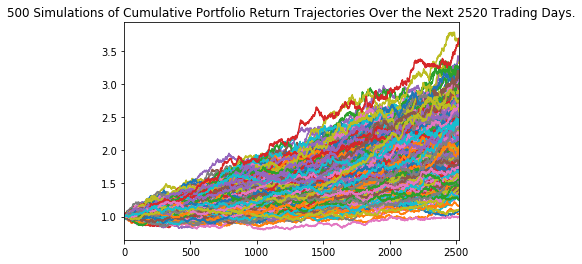

In [58]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
# YOUR CODE HERE

mctenplot = mcten.plot_simulation()


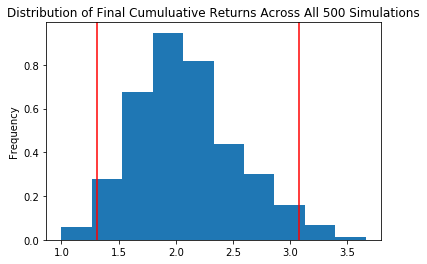

In [59]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
# YOUR CODE HERE

mctenhist = mcten.plot_distribution()


In [60]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
# YOUR CODE HERE

mcten_summary = mcten.summarize_cumulative_return()

# Review the 10-year Monte Carlo summary statistics
# YOUR CODE HERE

mcten_summary

count           500.000000
mean              2.085426
std               0.456267
min               0.999956
25%               1.770300
50%               2.045849
75%               2.347209
max               3.660897
95% CI Lower      1.310992
95% CI Upper      3.079274
Name: 2520, dtype: float64

### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [61]:
# Print the current balance of the stock and bond portion of the members portfolio
# YOUR CODE HERE

total_stocks_bonds


60688.7

In [63]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return = mcten_summary[8] * total_stocks_bonds
ci_upper_ten_cumulative_return = mcten_summary[9] * total_stocks_bonds


# Print the result of your calculations
# YOUR CODE HERE

display(ci_lower_ten_cumulative_return)
display(ci_upper_ten_cumulative_return)


79562.42598468332

186877.13682861507

#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?